In [1]:
%matplotlib inline
%config IPCompleter.greedy=True
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def stretch_factor(z_fac1, z_fac2):
    z_fac = 1.10
    tol = 1.0e-10
    test = 10.00
    knt = 0 
    while test > tol:
        knt = knt + 1 
        z_facn = (z_fac1*(z_fac - 1.0) + 1.0)**z_fac2
        test = abs(1.0 - z_facn / z_fac)
        if knt > 500:
            print('cannot find stretching factor')
            print('z_fac = {:12.10f}, z_facn = {:12.10f}, knt = {:d}'.format(z_fac, z_facn, knt))
        z_fac = z_facn
    return z_fac

def construct_stretched_z(depth, dz, nzt, nzb):
    # construct a stretched stretched grid

    z_cntr = depth
    z_frst = -dz 
    z_fac1 = z_cntr / z_frst
    z_fac2 = 1.0 / nzt
    z_fac = stretch_factor(z_fac1, z_fac2)

    zedgeOUT = np.zeros(nzt+2)
    zmidOUT = np.zeros(nzt+2)
    zedgeOUT[nzt+1] = dz
    zedgeOUT[nzt] = 0.0
    zedgeOUT[nzt-1] = -dz 
    iz = 2 
    for il in np.arange(nzt-2,nzb-1,-1):
        zedgeOUT[il] = zedgeOUT[nzt-1]*(z_fac**iz - 1.0) / (z_fac - 1.0)
        iz = iz + 1 
    zedgeOUT[nzb] = z_cntr

    zmidOUT[nzb+1:nzt+2] = 0.5*(zedgeOUT[nzb+1:nzt+2] + zedgeOUT[nzb:nzt+1])
    return zmidOUT, zedgeOUT

def construct_stretched_z_mld(depth, dz, nzt, nzb, mld):
    nzTop = int((nzt-nzb)*2/3)
    nz1 = int(nzTop/2)
    nz2 = nzTop - nz1 - 1
    z_ht = -mld

    z_fac1 = -z_ht / 2.0 / dz
    z_fac2 = 1.0 / nz1
    z_fac = stretch_factor(z_fac1, z_fac2)
    z_facbl = z_fac
    
    nzb1 = nzt - nzb - nzTop + 1
    z_fac2 = 1.0 / nzb1
    z_fac1 = -(z_ht - depth) / -dz
    z_fac = stretch_factor(z_fac1, z_fac2)

    zeINV = np.zeros(nzt+2)
    zeINV[nzb] = 0.0
    zeINV[nzb+1] = -dz
    for il in np.arange(nzb+2,nzb+nz1+1):
        zeINV[il] = zeINV[nzb+1]*(z_facbl**il - 1.0) / (z_facbl - 1.0)

    dzArray = np.zeros(nzt+2)
    dzArray[nzb] = -dz
    for il in np.arange(nzb+1,nz1+1):
        dzArray[il] = zeINV[il-1] - zeINV[il]

    zeINV[nzTop-1] = z_ht

    k = nzTop-2
    for il in np.arange(nzb+1,nz2+1):
        zeINV[k] = zeINV[k+1] + dzArray[il]
        k = k-1

    k=2
    zeINV[nzTop] = zeINV[nzTop-1] - dz
    for il in np.arange(nzTop+1,nzt+1):
        zeINV[il] = zeINV[nzb+1]*(z_fac**k-1.0) / (z_fac - 1) + zeINV[nzTop]
        k = k+1

    zedgeOUT = np.zeros(nzt+2)
    zmidOUT = np.zeros(nzt+2)
    k = nzt
    for il in np.arange(nzb,nzt+1):
        zedgeOUT[k] = zeINV[il]
        k = k - 1

    zedgeOUT[nzt+1] = dz

    zedgeOUT[nzb] = depth

    zmidOUT[nzb+1:nzt+2] = 0.5*(zedgeOUT[nzb+1:nzt+2] + zedgeOUT[nzb:nzt+1])
    return zmidOUT, zedgeOUT

In [3]:
zu, zw = construct_stretched_z(-250, 1, 32, 0)

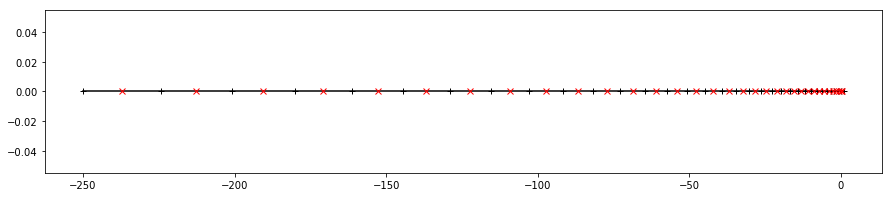

In [4]:
fig = plt.figure(figsize=[15,3])
plt.plot(zw, np.zeros(zw.size), '-k+')
plt.plot(zu, np.zeros(zu.size), 'rx')

In [5]:
zu2, zw2 = construct_stretched_z_mld(-250, 1, 32, 0, 100)

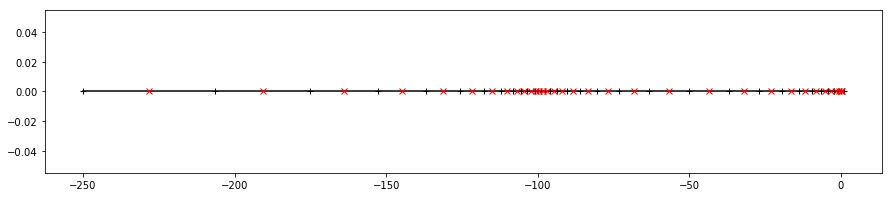

In [6]:
fig = plt.figure(figsize=[15,3])
plt.plot(zw2, np.zeros(zw2.size), '-k+')
plt.plot(zu2, np.zeros(zu2.size), 'rx')
# plt.xlim([-80, 30])